In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
import matplotlib

import numpy as np

GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)
TP_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=TP_GID))

In [2]:
def feature_engineering(df):
    # Missings en barrio
    data_set_mejorado = df.copy()
    barrios = df['barrio'].dropna()
    cantidad = df['barrio'].isna().value_counts()[True]
    muestra = barrios.sample(cantidad)
    it = iter(muestra)
    data_set_mejorado['barrio'] = data_set_mejorado['barrio'].apply(lambda x: next(it) if str(x) == 'nan' else x)

    # Missings en categoría de trabajo
    data_set_mejorado['categoria_de_trabajo'] = data_set_mejorado['categoria_de_trabajo'].apply(lambda x: 'Sin categoria' if str(x) == 'nan' else x)

    # Missings en trabajo
    data_set_mejorado['trabajo'] = data_set_mejorado['trabajo'].apply(lambda x: 'No responde' if str(x) == 'nan' else x)

    # Eliminación de categoría "sin trabajo"
    data_set_mejorado = data_set_mejorado[data_set_mejorado.categoria_de_trabajo != 'sin_trabajo']

    # Eliminación de el atributo eduación alcanzada
    del data_set_mejorado['educacion_alcanzada']

    # Juntamos casado y casada en una misma categoría.
    data_set_mejorado['rol_familiar_registrado'] = data_set_mejorado['rol_familiar_registrado'].apply(lambda x : 'casado' if x == 'casada' else x)
    
    return data_set_mejorado

In [3]:
df = feature_engineering(df)

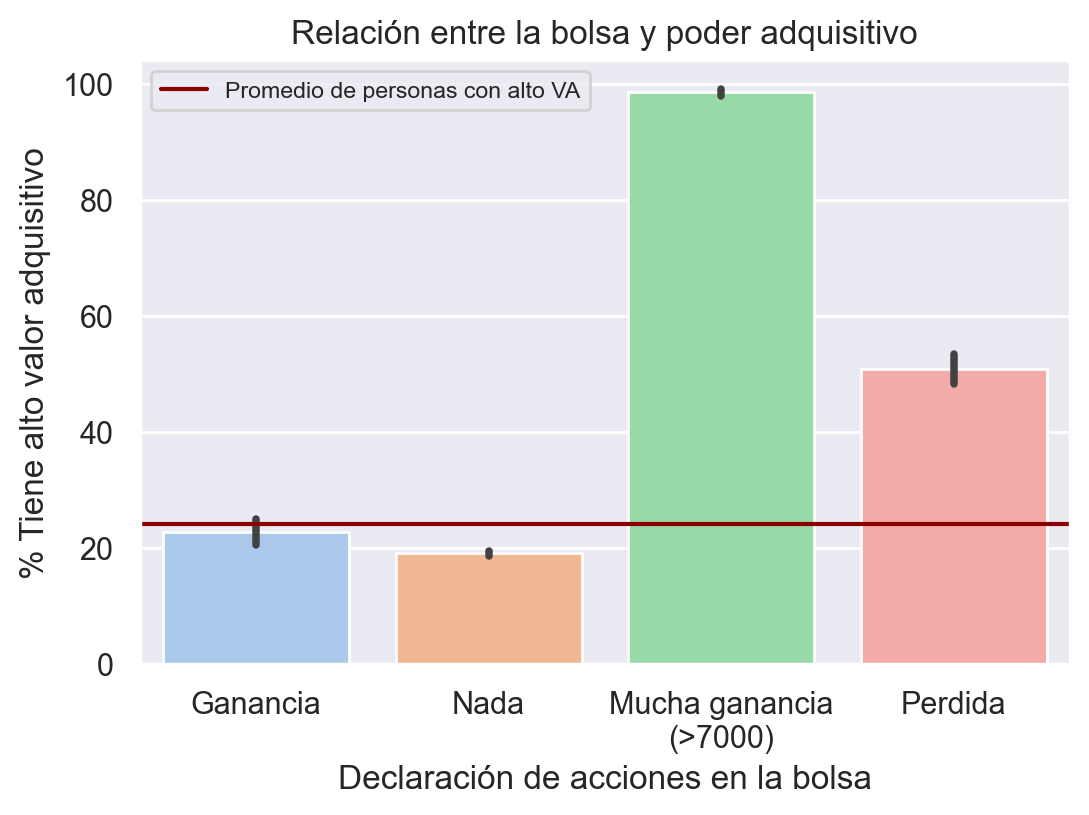

In [4]:
def accion_en_bolsa(x):
    if(x > 7000):
        return "Mucha ganancia\n(>7000)"
    elif(x > 0):
        return "Ganancia"
    elif(x == 0):
        return "Nada"
    else:             # No hace falta la necesidad de brindar un "Mucha perdida, no cambia nada."
        return "Perdida"

df_tmp = df.copy()
del df_tmp['ganancia_perdida_declarada_bolsa_argentina']
df_tmp['bolsa'] = df['ganancia_perdida_declarada_bolsa_argentina'].apply(accion_en_bolsa)

plt.figure(dpi=200)
ax = sns.barplot(
    data=df_tmp,
    palette="pastel",
    x='bolsa',
    y='tiene_alto_valor_adquisitivo',
    estimator=lambda x: np.mean(x)*100.0
)
plt.ylabel("% Tiene alto valor adquisitivo")
plt.xlabel("Declaración de acciones en la bolsa")
plt.title('Relación entre la bolsa y poder adquisitivo')
prom = df_tmp['tiene_alto_valor_adquisitivo'].mean()*100.0
plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
plt.legend(loc='upper left', fontsize='x-small')
plt.show()

In [5]:
df_tmp['bolsa'].value_counts()

Nada                       28323
Perdida                     1519
Mucha ganancia\n(>7000)     1399
Ganancia                    1313
Name: bolsa, dtype: int64

Es notable observar que la amplia cantidad de gente que obtiene mucha ganancia, esto es g > 7000, tiene casi en su totalidad poder adquisitivo alto.

Mientras que también están las otras opciones, que serán Pérdida, Ganancia y Nada. De las cuales las proporciones de Ganancia y Nada son similares, mientras que se observa un comportamiento diferente en Pérdida.

Por lo que se propone dividir el data frame en 2: Ganancia/Nada y Perdida.
Mientras que aquellas personas que obtuvieron una ganancia mayor a 7000 serán consideradas como personas cuyo valor adquisitivo es alto.

In [6]:
#Error cometido:
df_tmp = df[df['ganancia_perdida_declarada_bolsa_argentina'] > 7000]
i = np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 1)
print(f"El error cometido será de: {round((1-i)*100,1)}% sobre un total de: {len(df_tmp)} muestras")

El error cometido será de: 1.4% sobre un total de: 1399 muestras


In [7]:
df_pipeline_Nada = df[df['ganancia_perdida_declarada_bolsa_argentina'] == 0]
df_pipeline_PerGan = df[(df['ganancia_perdida_declarada_bolsa_argentina'] != 0) & (df['ganancia_perdida_declarada_bolsa_argentina'] <= 7000)]

In [8]:
df_pipeline_Nada

,anios_estudiados,barrio,categoria_de_trabajo,edad,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
1,17,Palermo,monotibutista,50,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,matrimonio_civil,0,mujer,40,judaismo,casado,0,profesional_especializado
5,18,Palermo,relacion_de_dependencia,37,matrimonio_civil,0,mujer,40,cristianismo,casado,0,directivo_gerente
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,14,Palermo,relacion_de_dependencia,22,sin_matrimonio,0,hombre,40,cristianismo,sin_familia,0,seguridad
32556,16,Palermo,relacion_de_dependencia,27,matrimonio_civil,0,mujer,38,cristianismo,casado,0,soporte_tecnico
32557,13,Palermo,relacion_de_dependencia,40,matrimonio_civil,0,hombre,40,cristianismo,casado,1,inspector
32558,13,Palermo,relacion_de_dependencia,58,viudo_a,0,mujer,40,cristianismo,soltero_a,0,entretenimiento


In [9]:
df_pipeline_PerGan

,anios_estudiados,barrio,categoria_de_trabajo,edad,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
9,17,Palermo,relacion_de_dependencia,42,matrimonio_civil,5178,hombre,40,cristianismo,casado,1,directivo_gerente
23,11,Palermo,relacion_de_dependencia,43,matrimonio_civil,-2042,hombre,40,cristianismo,casado,0,transporte
32,17,Palermo,relacion_de_dependencia,45,divorciado,-1408,hombre,40,cristianismo,con_hijos,0,directivo_gerente
52,19,Versalles,relacion_de_dependencia,47,matrimonio_civil,-1902,mujer,60,cristianismo,casado,1,profesional_especializado
...,...,...,...,...,...,...,...,...,...,...,...,...
32458,17,Palermo,relacion_de_dependencia,36,matrimonio_civil,-1977,hombre,45,cristianismo,casado,1,profesional_especializado
32473,18,Palermo,empleadao_estatal,41,divorciado,1506,mujer,40,cristianismo,soltero_a,0,profesional_especializado
32500,11,Palermo,relacion_de_dependencia,34,divorciado,-880,hombre,60,cristianismo,soltero_a,0,transporte
32515,10,Palermo,empleadao_estatal,66,matrimonio_civil,3471,hombre,40,cristianismo,casado,0,reparador


## Definición de funciones generales

##### Años estudiados

In [10]:
def plot_vs_anios_estudiados(df, title='Relación entre la cantidad de años estudiados y poder adquisitivo'):
    plt.figure(dpi=200)

    df_tmp = df[['anios_estudiados', 'tiene_alto_valor_adquisitivo']].copy()
    ax = sns.barplot(
        data=df_tmp,
        palette="Blues_d",
        x='anios_estudiados',
        y='tiene_alto_valor_adquisitivo',
        estimator = lambda x: np.mean(x)*100.0
    )

    plt.ylabel("% Tiene alto valor adquisitivo")
    plt.xlabel("Años estudiados")
    plt.title(title)
    prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
    plt.axhline(prom, color="lightblue", label="Promedio de personas con alto VA")
    plt.legend()
    plt.show()

##### Rol familiar

In [11]:
def plot_vs_rol_familiar(df, title='Relación entre el rol familiar registrado y el poder adquisitivo'):
    plt.figure(dpi=200)

    df_tmp = df[['rol_familiar_registrado', 'tiene_alto_valor_adquisitivo']].copy()
    orden = df_tmp.groupby(['rol_familiar_registrado'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

    ax = sns.barplot(
        data=df_tmp,
        palette = "pastel",
        x='rol_familiar_registrado',
        y='tiene_alto_valor_adquisitivo',
        order=orden['rol_familiar_registrado'],
        estimator = lambda x : np.mean(x)*100.0
    )

    plt.ylabel("% Tiene alto valor adquisitivo")
    plt.xlabel("Rol familiar registrado")
    plt.title(title)
    prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
    plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
    plt.legend()
    plt.show()

##### Edad

In [12]:
def plot_vs_edad(df):
    df_tmp = df[['edad', 'tiene_alto_valor_adquisitivo']].copy()
    df_tmp['bins'] = pd.cut(df_tmp['edad'], range(0, int(df_tmp['edad'].max()) + 10,10))
    # Configuro el grafico, armo el countplot y setteo labels varios
    fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
    sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
    ax.set_title('Personas con alto poder adquisitivo segun rango etario')
    ax.set_xlabel('Edades')
    ax.set_ylabel('Cantidad')
    plt.legend(['Bajo', 'Alto'], loc='upper right')
    plt.show()

##### Trabajo

In [24]:
def plot_vs_trabajo(df):
    plt.figure(dpi=200)

    df_trabajo_vs_va = df[['trabajo', 'tiene_alto_valor_adquisitivo']].copy()
    orden = df_trabajo_vs_va.groupby(['trabajo'])['tiene_alto_valor_adquisitivo'].aggregate(lambda x : np.mean(x)).reset_index().sort_values('tiene_alto_valor_adquisitivo', ascending = False)

    ax = sns.barplot(
        data=df_trabajo_vs_va,
        palette="pastel",
        x='trabajo',
        y='tiene_alto_valor_adquisitivo',
        order=orden['trabajo'],
        estimator=lambda x: np.mean(x)*100.0
    )

    plt.ylabel("% Tiene alto valor adquisitivo")
    plt.xlabel("Trabajo")
    plt.xticks(rotation=90)
    plt.title('Relación entre el tipo de trabajo y poder adquisitivo')
    prom = df['tiene_alto_valor_adquisitivo'].mean()*100.0
    plt.axhline(prom, color="darkred", label="Promedio de personas con alto VA")
    plt.legend()
    plt.show()

##### HeatMap rango etario y horas trabajadas

In [30]:
def plot_hm_rEtario_vs_hTrabajadas(df):
    plt.figure(dpi = 160)
    df_tmp = df.copy()
    df_tmp['bins_edades'] = pd.cut(df['edad'], range(0, int(df['edad'].max()) + 10,10))
    df_tmp['bins_horas_trabajadas'] = pd.cut(df['horas_trabajo_registradas'], range(0, int(df['horas_trabajo_registradas'].max()) + 10,10))
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'bins_horas_trabajadas',
        'bins_edades',
        'mean'
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.ylabel("Horas de trabajo registradas")
    plt.xlabel("Rango etario")
    plt.show()

##### HeatMap tipo de trabajo y categoría de trabajo

In [170]:
def plot_hm_trabajo_vs_cTrabajo(df, tipo='mean'):
    if(tipo == 'mean'):
        plot_fmt = '.2g'
    else:
        plot_fmt = 'd'

    plt.figure(dpi = 200, figsize=(8,5))
    df_tmp = df.copy()
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'categoria_de_trabajo',
        'trabajo',
        tipo
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True, fmt=plot_fmt)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.ylabel("Categoría de trabajo")
    plt.xlabel("Trabajo")
    plt.show()

##### HeatMap trabajo y horas trabajadas

In [132]:
def plot_hm_trabajo_vs_hTrabajadas(df):
    plt.figure(dpi = 160)
    df_tmp = df.copy()
    df_tmp['bins_horas_trabajadas'] = pd.cut(df['horas_trabajo_registradas'], range(0, int(df['horas_trabajo_registradas'].max()) + 10,10))
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'trabajo',
        'bins_horas_trabajadas',
        'mean'
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.ylabel("Trabajo")
    plt.xlabel("Horas de trabajo registradas")
    plt.show()

##### HeatMap categoría de trabajo y horas trabajadas

In [137]:
def plot_hm_categoria_vs_hTrabajadas(df):
    plt.figure(dpi = 160)
    df_tmp = df.copy()
    df_tmp['bins_horas_trabajadas'] = pd.cut(df['horas_trabajo_registradas'], range(0, int(df['horas_trabajo_registradas'].max()) + 10,10))
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'categoria_de_trabajo',
        'bins_horas_trabajadas',
        'mean'
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.ylabel("Categoría de trabajo")
    plt.xlabel("Horas de trabajo registradas")
    plt.show()

##### HeatMap género y horas trabajadas

In [139]:
def plot_hm_genero_vs_hTrabajadas(df):
    plt.figure(dpi = 160)
    df_tmp = df.copy()
    df_tmp['bins_horas_trabajadas'] = pd.cut(df['horas_trabajo_registradas'], range(0, int(df['horas_trabajo_registradas'].max()) + 10,10))
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'genero',
        'bins_horas_trabajadas',
        'mean'
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.ylabel("Género")
    plt.xlabel("Horas de trabajo registradas")
    plt.show()

##### Género y categoría de trabajo

In [163]:
def plot_hm_genero_vs_cTrabajo(df, tipo='mean'):
    if(tipo == 'mean'):
        plot_fmt = '.2g'
    else:
        plot_fmt = 'd'
    plt.figure(dpi = 160)
    df_tmp = df.copy()
    cooccurrence_g = pd.pivot_table(
        df_tmp,
        'tiene_alto_valor_adquisitivo',
        'categoria_de_trabajo',
        'genero',
        tipo
    )
    sns.heatmap(cooccurrence_g, cmap='Wistia', annot = True, fmt=plot_fmt)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.ylabel("Categoría de trabajo")
    plt.xlabel("Género")
    plt.show()

## Búsqueda de la siguiente condición para aquellos que no accionaron en la Bolsa

#### Rol familiar

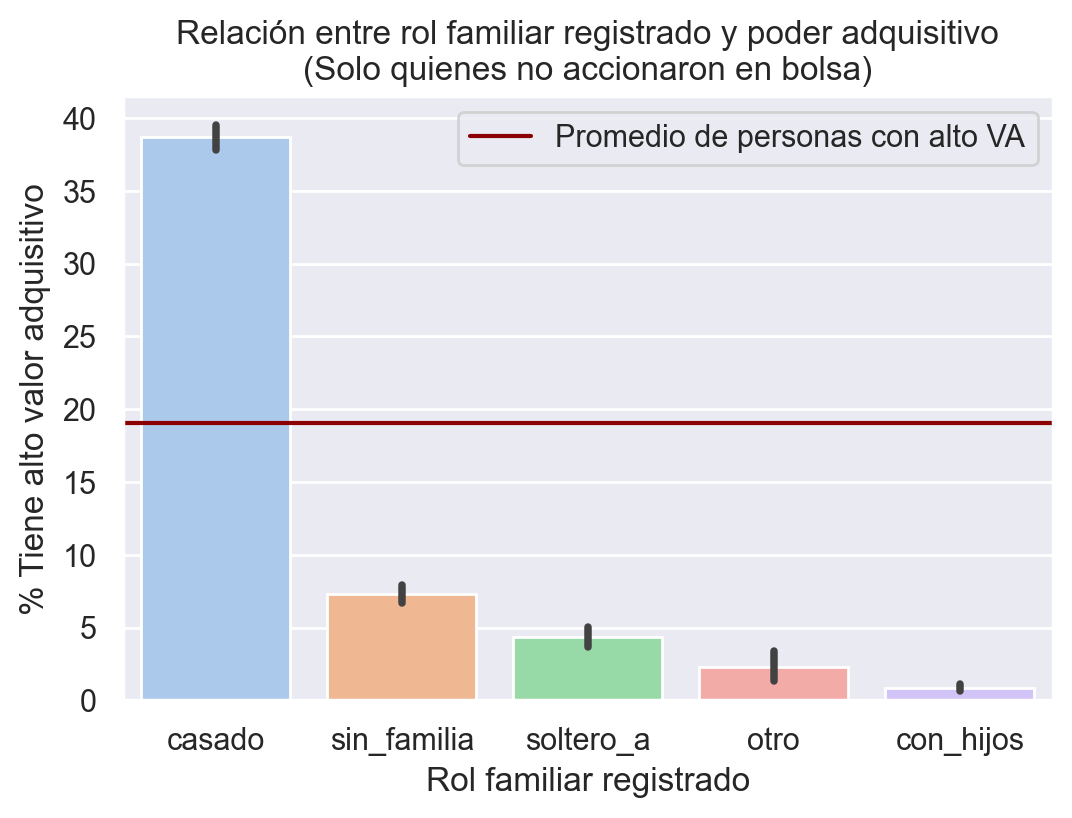

In [15]:
plot_vs_rol_familiar(
    df_pipeline_Nada,
    title='Relación entre rol familiar registrado y poder adquisitivo\n(Solo quienes no accionaron en bolsa)'
)

In [16]:
df_pipeline_Nada['rol_familiar_registrado'].value_counts()

casado         12010
sin_familia     7426
con_hijos       4805
soltero_a       3172
otro             910
Name: rol_familiar_registrado, dtype: int64

De aquí podemos quitar con suficiente certeza a todos aquellos que no están casados, quitando la mayor parte del dataset.

Veamos con qué índice estamos errando al estimar que ninguno tendrá poder adquisitivo alto

In [17]:
df_tmp = df_pipeline_Nada[df_pipeline_Nada['rol_familiar_registrado'] != 'casado']
i=np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 0)
print(f"El error cometido tras esta acción será: {round((1-i)*100,1)}% sobre un total de {len(df_tmp)} muestras")

El error cometido tras esta acción será: 4.6% sobre un total de 16313 muestras


In [18]:
df_pipeline_Nada = df_pipeline_Nada[df_pipeline_Nada['rol_familiar_registrado'] == 'casado']

##### Años estudiados

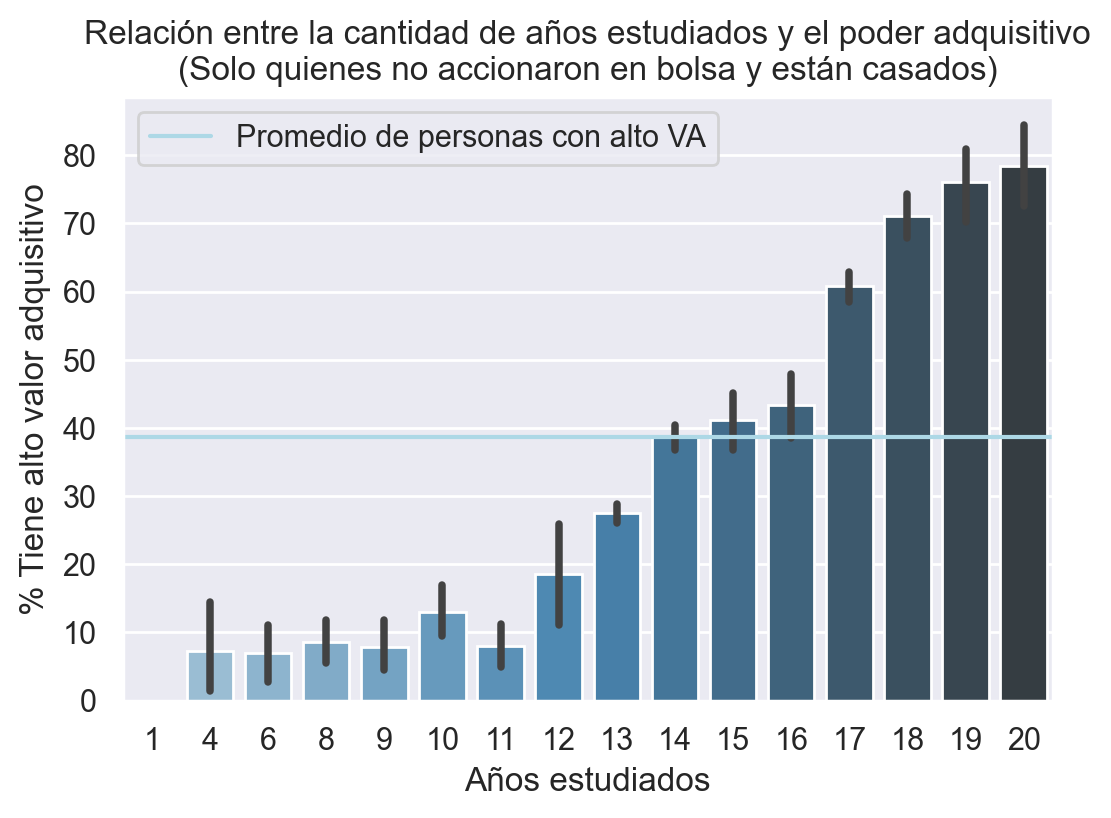

In [19]:
plot_vs_anios_estudiados(
    df_pipeline_Nada,
    title='Relación entre la cantidad de años estudiados y el poder adquisitivo\n(Solo quienes no accionaron en bolsa y están casados)'
)

In [20]:
print(f"Cantidad restante {len(df_pipeline_Nada)}")

df_tmp = df_pipeline_Nada[df_pipeline_Nada['anios_estudiados'] < 13].copy()
i = np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 0)
print(f"Años < 13 - Error: {round((1-i)*100,2)}% de {len(df_tmp)}")

df_tmp = df_pipeline_Nada[df_pipeline_Nada['anios_estudiados'] > 17].copy()
i = np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 1)
print(f"Años > 17 - Error: {round((1-i)*100,2)}% de {len(df_tmp)}")

df_tmp = df_pipeline_Nada[(df_pipeline_Nada['anios_estudiados'] >= 13) & (df_pipeline_Nada['anios_estudiados'] <= 17)]
print(f"Quedan {len(df_tmp)} muestras a tratar")

Cantidad restante 12010
Años < 13 - Error: 9.7% de 1454
Años > 17 - Error: 26.63% de 1138
Quedan 9418 muestras a tratar


In [21]:
df_pipeline_Nada = df_pipeline_Nada[(df_pipeline_Nada['anios_estudiados'] >= 13) & (df_pipeline_Nada['anios_estudiados'] <= 17)]

### Edad

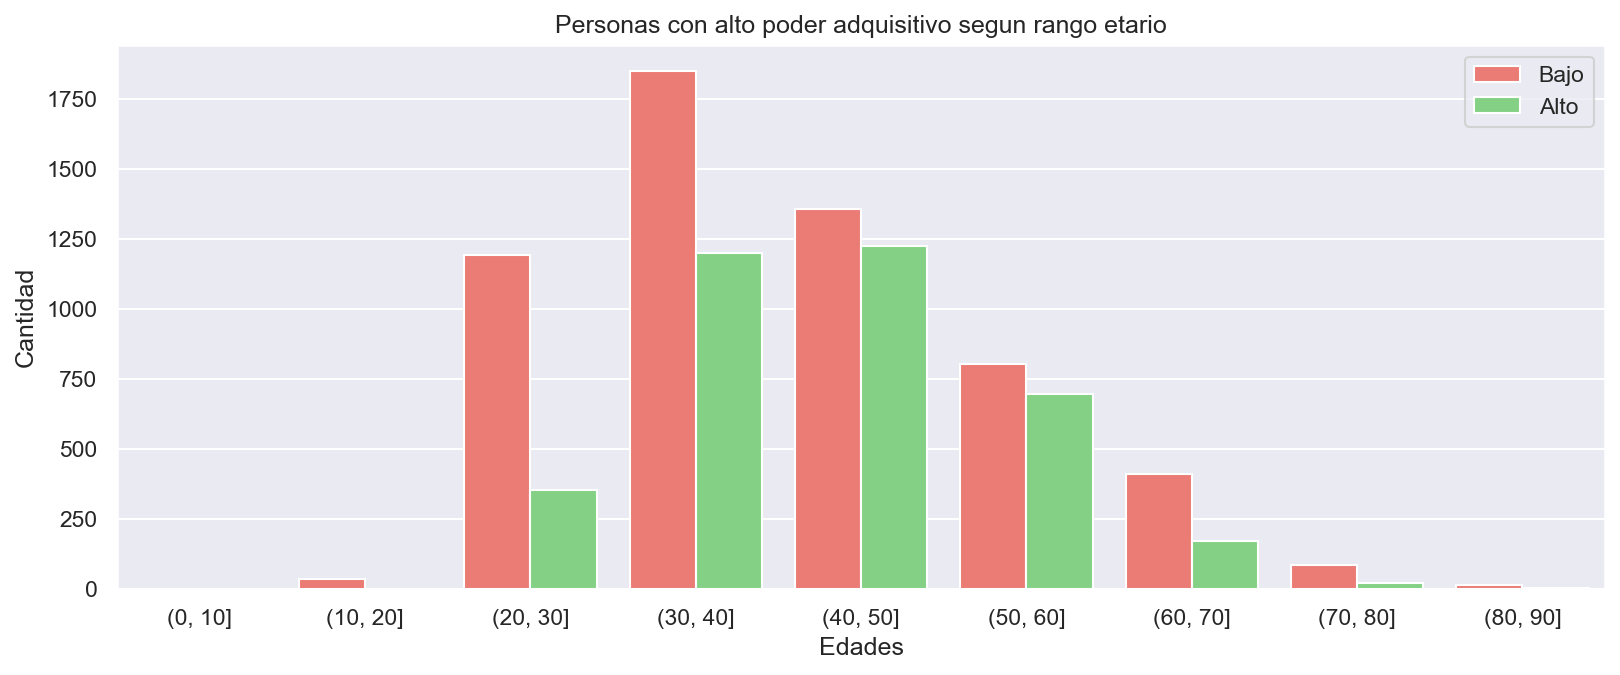

In [22]:
plot_vs_edad(df_pipeline_Nada)

No sirve

##### Trabajo

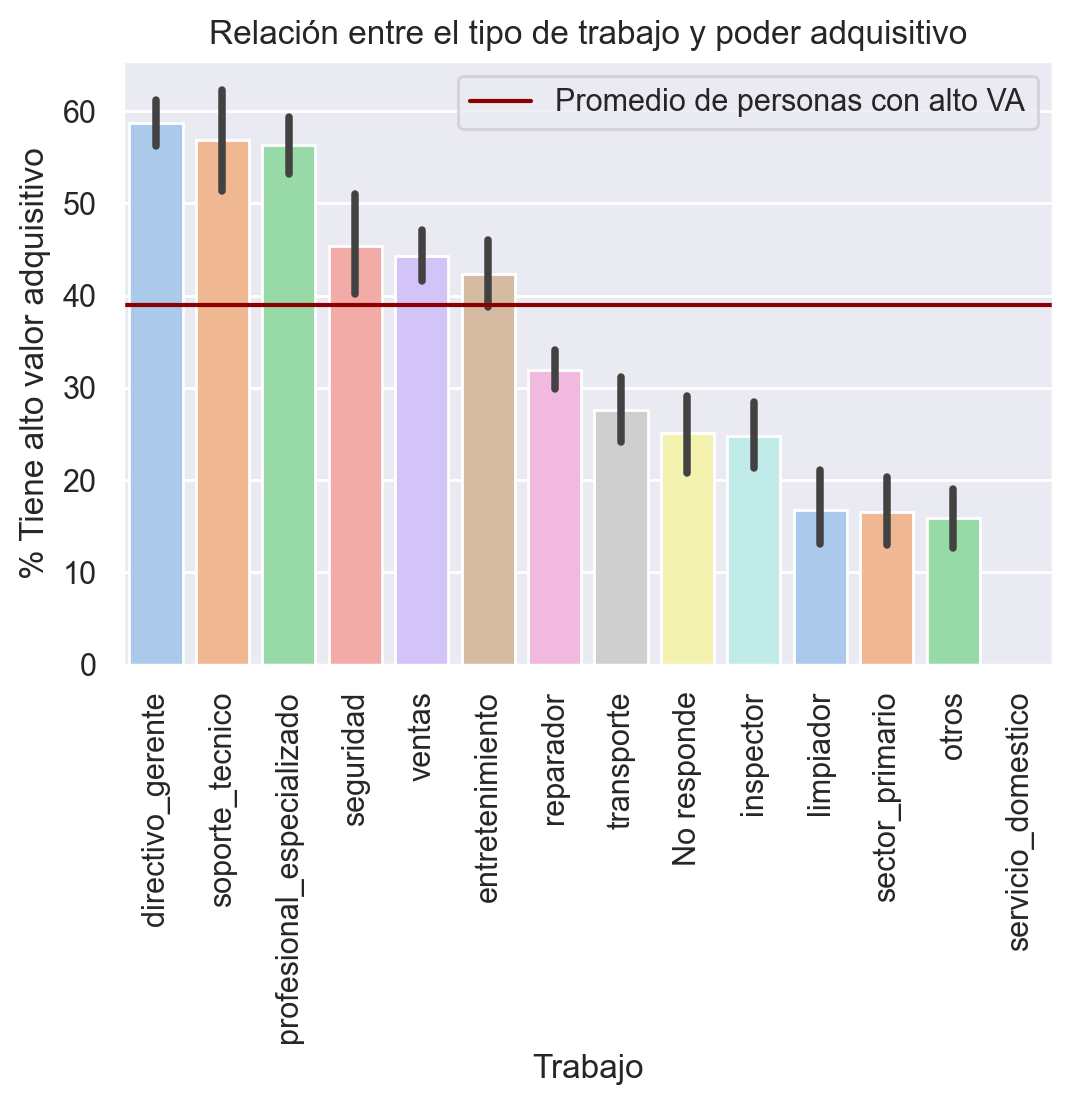

In [25]:
plot_vs_trabajo(df_pipeline_Nada)

Sirve, pero pienso que sería un overfit

##### Rango etario y horas trabajadas

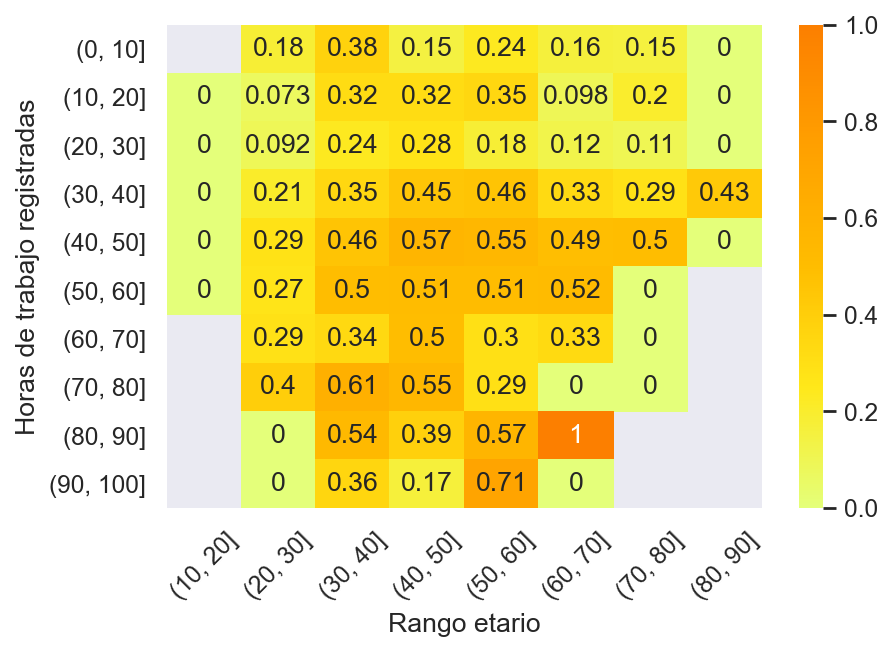

In [133]:
plot_hm_rEtario_vs_hTrabajadas(df_pipeline_Nada)

Nuevamente estamos frente a una situación que yo considero Overfit

##### Trabajo y horas trabajadas

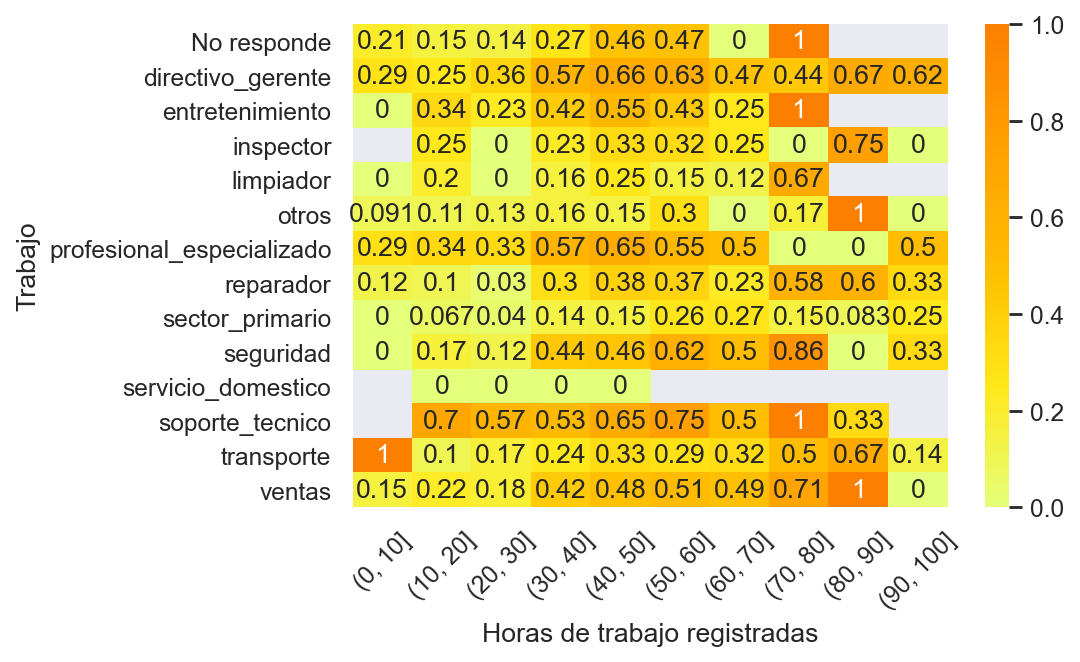

In [134]:
plot_hm_trabajo_vs_hTrabajadas(df_pipeline_Nada)

In [135]:
def cumple_condicion(df):
    trabajo = df['trabajo'].isin(['directivo_gerente', 'profesional_especializado', 'soporte_tecnico'])
    horas = df['horas_trabajo_registradas'].isin(range(31, 61))
    return trabajo & horas

print("Nueva predicción de unos")
df_tmp = df_pipeline_Nada[cumple_condicion(df_pipeline_Nada)].copy()
print(len(df_tmp))
print(np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 1))

print("\nNueva predicción de ceros")
df_tmp = df_pipeline_Nada[~cumple_condicion(df_pipeline_Nada)].copy()
print(len(df_tmp))
print(np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 0))

print("\nViejo")
df_tmp = df_pipeline_Nada.copy()
print(len(df_tmp))
print(np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == 0))

print("\nNuevo")
df_tmp = df_pipeline_Nada.copy()
print(len(df_tmp))
print(np.mean(df_tmp['tiene_alto_valor_adquisitivo'] == cumple_condicion(df_tmp)))



Nueva predicción de unos
2370
0.5978902953586498

Nueva predicción de ceros
7048
0.6801929625425652

Viejo
9418
0.6102144829050754

Nuevo
9418
0.6594818432788278


Por lo que se mejora un 5%, no creo que esté justificado, son literalmente 5%*9400 =~ 500 personas

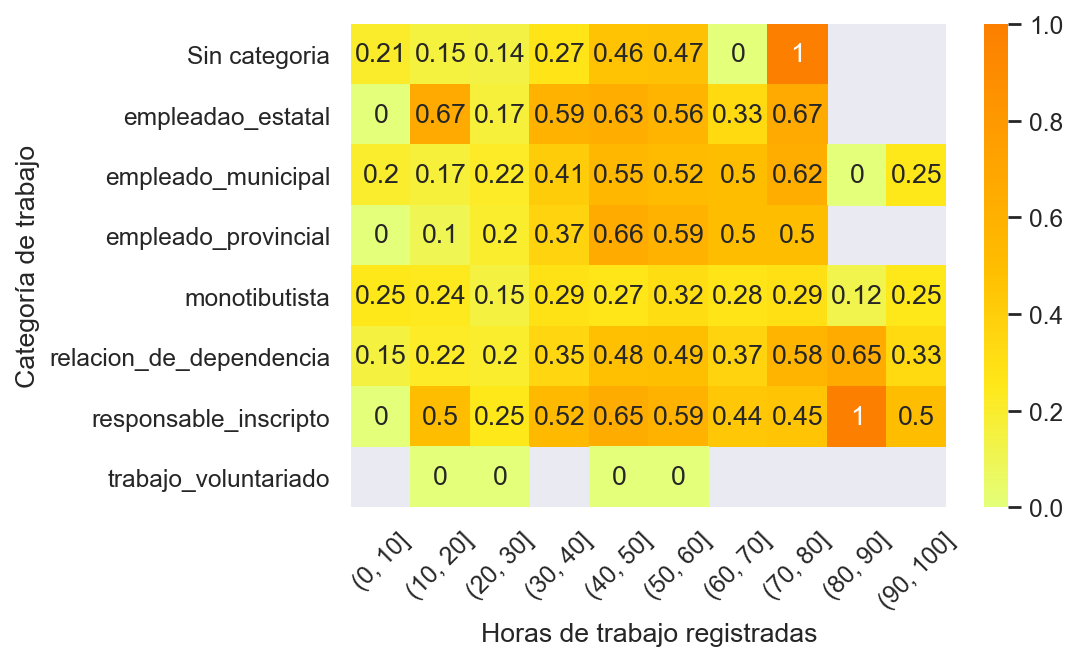

In [138]:
plot_hm_categoria_vs_hTrabajadas(df_pipeline_Nada)

Entramos en un problemas, la mayor cantidad de personas se encuentran en relación de dependencia trabajando entre 30 y 40 horas. Por lo que, de este gráfico no podríamos conseguir información útil, porque lo demás es prácticametne ruido

##### Género y religión

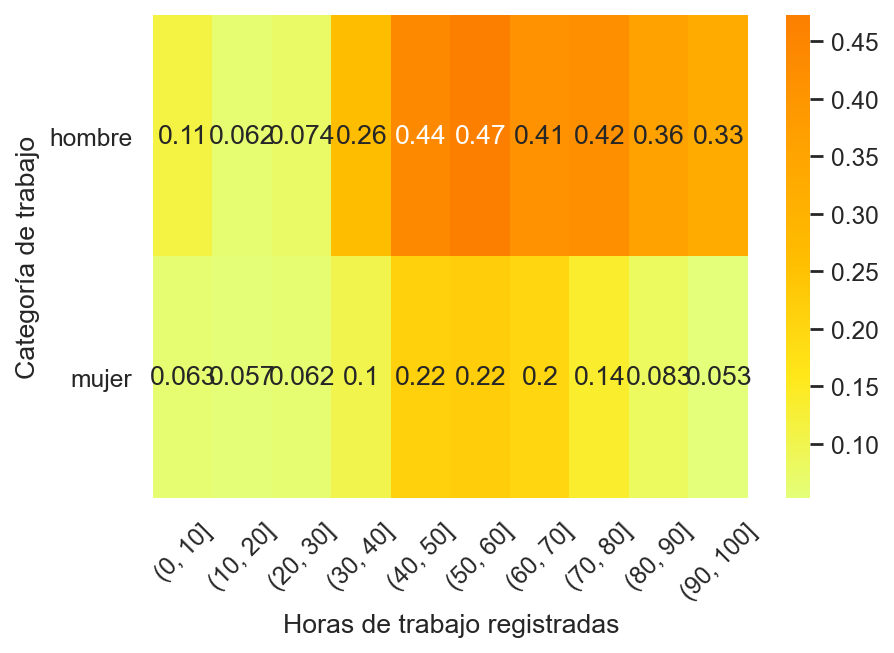

In [142]:
plot_hm_genero_vs_hTrabajadas(df)

No sirve

##### Género y categoría de trabajo

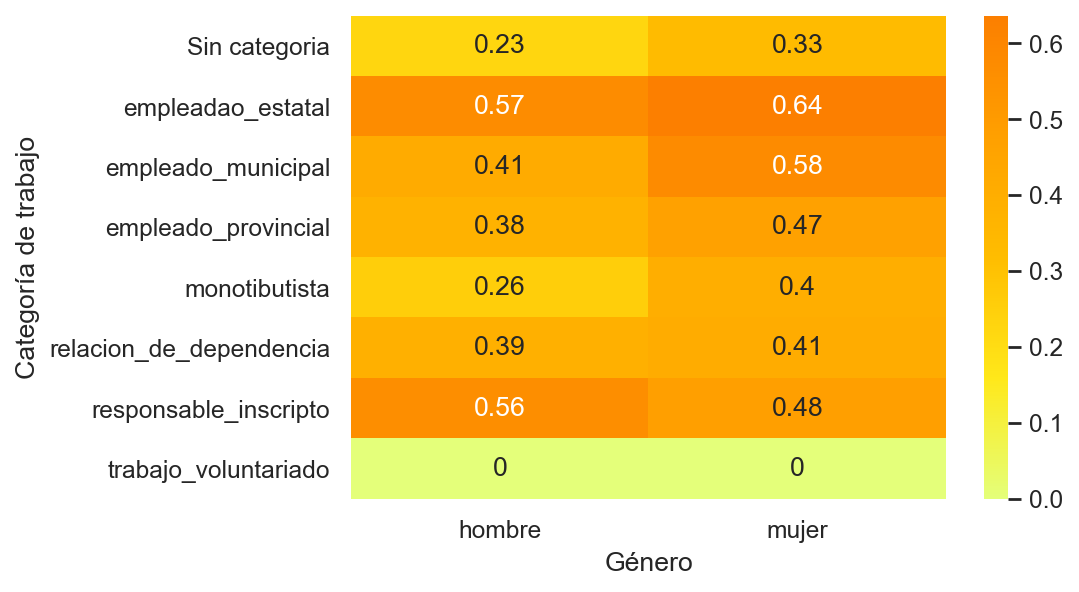

In [157]:
plot_hm_genero_vs_cTrabajo(df_pipeline_Nada)

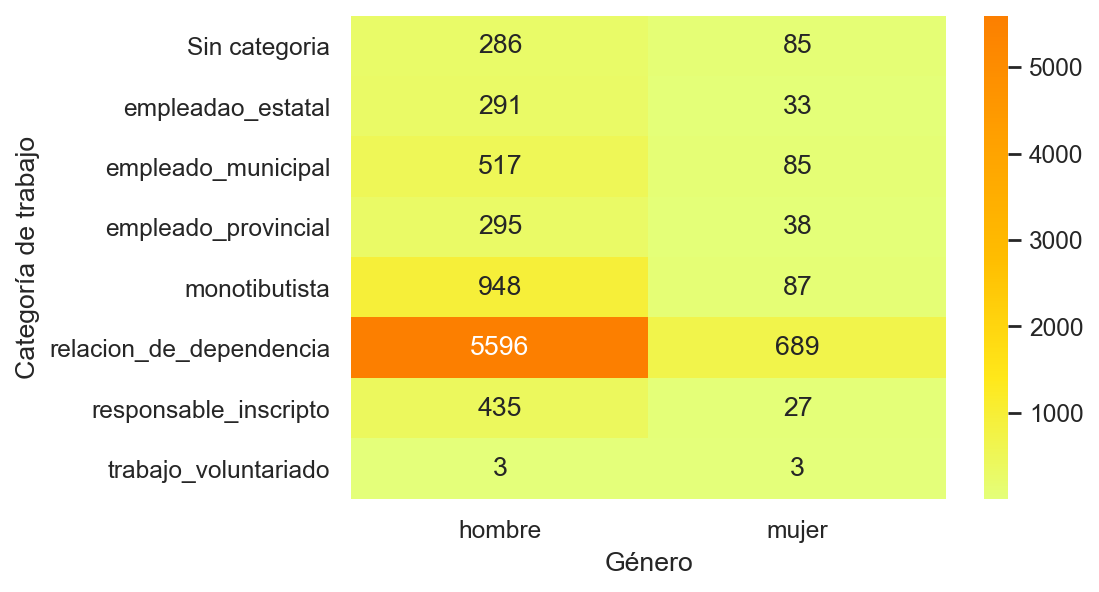

In [158]:
plot_hm_genero_vs_cTrabajo(df_pipeline_Nada, tipo='count')

Nuevamente, esto no nos da información relevante

##### Categoría y trabajo

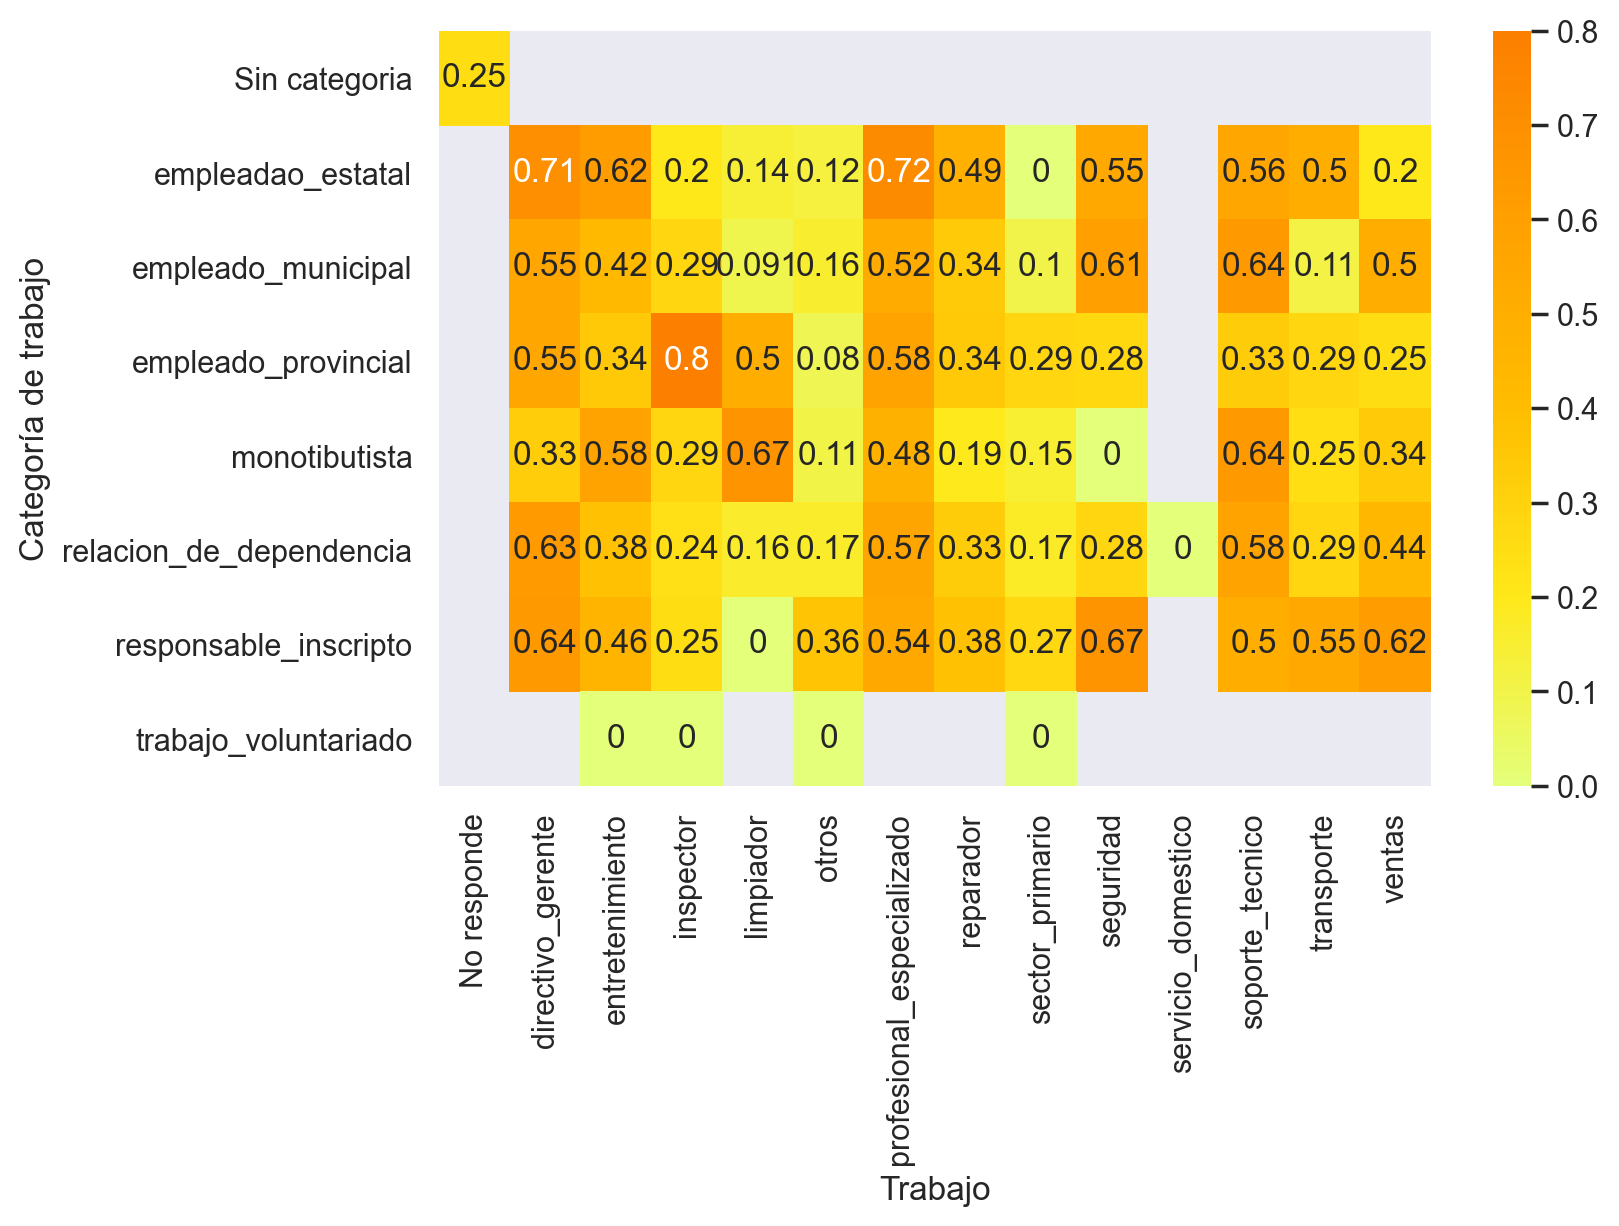

In [175]:
plot_hm_trabajo_vs_cTrabajo(df_pipeline_Nada)

#### Por lo que, la única forma que encontré de mejorar dicha condición es usar la de trabajo y horas trabajadas.

In [177]:
def buen_trabajo_y_suficientes_horas_trabajadas(df):
    trabajo = df['trabajo'].isin(['directivo_gerente', 'profesional_especializado', 'soporte_tecnico'])
    horas = df['horas_trabajo_registradas'].isin(range(31, 61))
    return trabajo & horas

## Búsqueda de la siguiente condición para aquellos que accionaron en la Bolsa (con pocas ganancias)

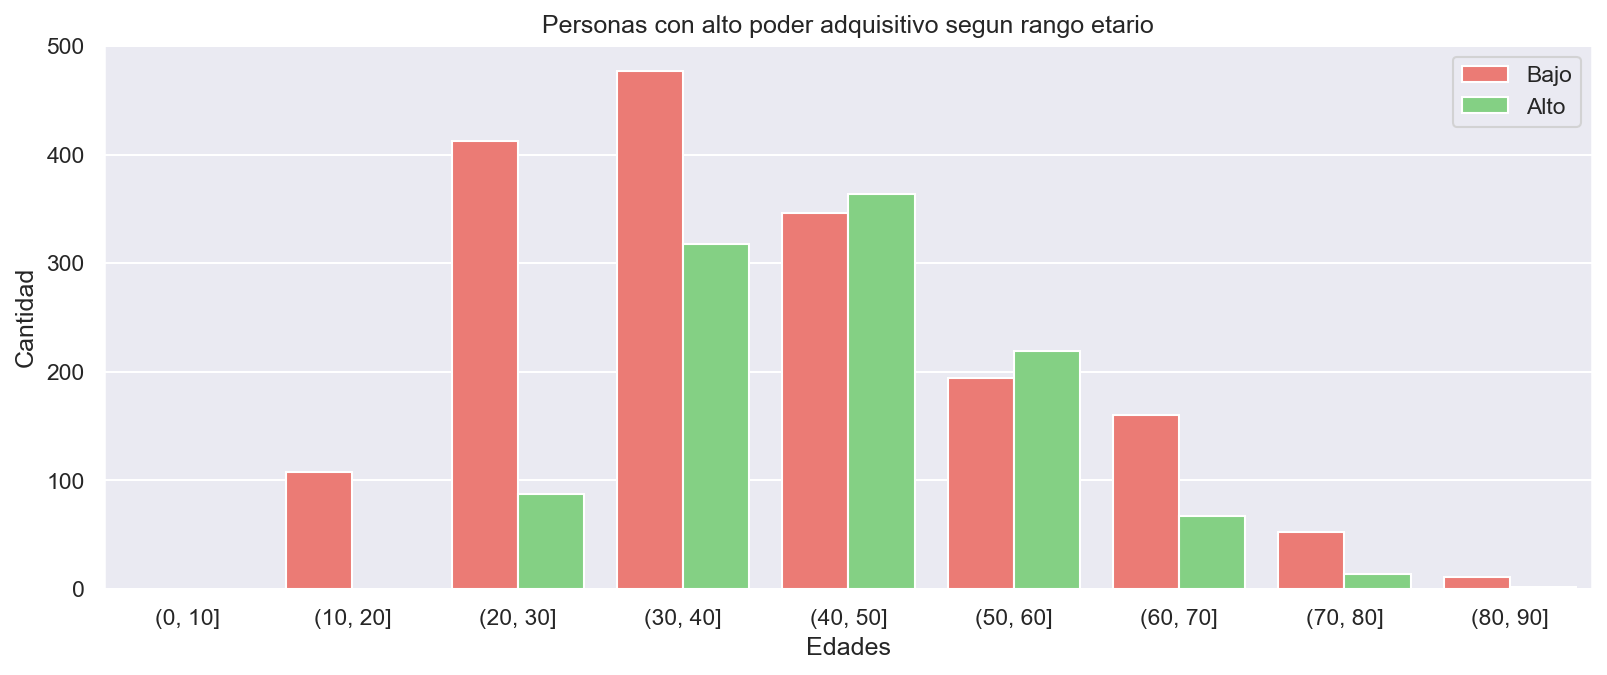

In [194]:
plot_vs_edad(df_pipeline_PerGan)

## BaseLine

In [201]:
def buen_trabajo_y_suficientes_horas_trabajadas(row):
    trabajo = row['trabajo'] in ['directivo_gerente', 'profesional_especializado', 'soporte_tecnico']
    horas = row['horas_trabajo_registradas'] in range(31, 61)
    return trabajo & horas

def baseline(row):
    if(row['ganancia_perdida_declarada_bolsa_argentina'] > 7000):
        return 1
    elif(row['ganancia_perdida_declarada_bolsa_argentina'] == 0):
        if(row['rol_familiar_registrado'] == 'casado'):
            if(row['anios_estudiados'] > 17):
                l.append("a")
                return 1
            elif(row['anios_estudiados'] < 13):
                return 0
            else:
                if(buen_trabajo_y_suficientes_horas_trabajadas(row)):
                    return 1
                else:
                    return 0
        else:
            return 0
    else:
        # Laburarlo // Son 2832 personas. <- [1: 1071 ; 0: 1761]
        return 0

np.mean(df['tiene_alto_valor_adquisitivo'] == df.apply(baseline, axis=1))

0.8314800024574553

In [ ]:
df_pipeline_PerGan['tiene_alto_valor_adquisitivo'].value_counts()

In [ ]:
df_pipeline_Nada['tiene_alto_valor_adquisitivo'].value_counts()

In [203]:
df_0 = df[df['tiene_alto_valor_adquisitivo'] == 0].copy()
np.mean(df_0['tiene_alto_valor_adquisitivo'] == df_0.apply(baseline, axis=1))

0.9483672561000284

In [202]:
df_1 = df[df['tiene_alto_valor_adquisitivo'] == 1].copy()
np.mean(df_1['tiene_alto_valor_adquisitivo'] == df_1.apply(baseline, axis=1))

0.4630786889427369